## Regressão vetorial de suporte: opção à regressão linear múltipla

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_es = pd.read_csv('enem_2022_es_tratado.csv', sep=',', encoding='iso-8859-1')

Análise Inicial

In [3]:
enem_es

,NU_INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,NO_MUNICIPIO_ESC,NO_MUNICIPIO_PROVA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"2,10E+11",21,M,1,parda,1,1,nao_respondeu,NaN,Cariacica,...,416.0,espanhol,1.0,120.0,40.0,40.0,100.0,20.0,320.0,sim
1,"2,10E+11",19,F,1,parda,1,1,nao_respondeu,NaN,Colatina,...,460.8,espanhol,1.0,100.0,140.0,100.0,140.0,120.0,600.0,sim
2,"2,10E+11",17,F,1,parda,1,2,privada,NaN,Colatina,...,449.3,espanhol,1.0,160.0,160.0,140.0,160.0,160.0,780.0,sim
3,"2,10E+11",41_45,F,3,parda,1,1,nao_respondeu,NaN,Vila Velha,...,437.6,espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,sim
4,"2,10E+11",17,M,1,parda,1,2,publica,Viana,Cariacica,...,464.2,ingles,1.0,120.0,120.0,120.0,160.0,140.0,660.0,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11812,"2,10E+11",18,M,1,branca,1,2,publica,Vila Velha,Vila Velha,...,596.5,ingles,1.0,80.0,120.0,80.0,100.0,60.0,440.0,sim
11813,"2,10E+11",17,F,1,parda,1,2,publica,Serra,Serra,...,630.6,espanhol,1.0,160.0,140.0,120.0,160.0,120.0,700.0,sim
11814,"2,10E+11",36_40,F,2,parda,1,1,nao_respondeu,NaN,Vila Velha,...,457.0,espanhol,1.0,120.0,160.0,120.0,120.0,160.0,680.0,sim
11815,"2,10E+11",19,F,1,parda,1,1,nao_respondeu,NaN,Vila Velha,...,545.6,ingles,1.0,120.0,160.0,120.0,160.0,140.0,700.0,sim


In [4]:
enem_es.shape

(11817, 27)

Objetivo: criar um modelo matemático para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.

#### selecionar Município

In [5]:
municipiox = enem_es.loc[enem_es.NO_MUNICIPIO_ESC == 'Viana']

In [6]:
municipiox.shape

(68, 27)

In [7]:
municipiox.head()

,NU_INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,NO_MUNICIPIO_ESC,NO_MUNICIPIO_PROVA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
4,"2,10E+11",17,M,1,parda,1,2,publica,Viana,Cariacica,...,464.2,ingles,1.0,120.0,120.0,120.0,160.0,140.0,660.0,nao
678,"2,10E+11",18,F,1,parda,1,2,publica,Viana,Viana,...,497.9,espanhol,1.0,140.0,180.0,160.0,180.0,120.0,780.0,sim
692,"2,10E+11",17,M,1,preta,1,2,publica,Viana,Viana,...,514.8,ingles,1.0,100.0,180.0,100.0,120.0,120.0,620.0,sim
818,"2,10E+11",18,F,1,parda,1,2,publica,Viana,Viana,...,504.7,espanhol,1.0,140.0,180.0,160.0,200.0,200.0,880.0,sim
1309,"2,10E+11",18,F,1,branca,1,2,publica,Viana,Viana,...,567.7,espanhol,1.0,140.0,120.0,100.0,120.0,140.0,620.0,sim


1) Analisar a classificação das variáveis

In [8]:
municipiox.dtypes

NU_INSCRICAO           object
FAIXA_ETARIA           object
SEXO                   object
ESTADO_CIVIL            int64
RACA                   object
NACIONALIDADE           int64
TP_ST_CONCLUSAO         int64
ESCOLA                 object
NO_MUNICIPIO_ESC       object
NO_MUNICIPIO_PROVA     object
TP_PRESENCA_CN          int64
TP_PRESENCA_CH          int64
TP_PRESENCA_LC          int64
TP_PRESENCA_MT          int64
NOTA_CN               float64
NOTA_CH               float64
NOTA_LC               float64
NOTA_MT               float64
TP_LINGUA              object
TP_STATUS_REDACAO     float64
COMP1                 float64
COMP2                 float64
COMP3                 float64
COMP4                 float64
COMP5                 float64
NOTA_REDACAO          float64
INTERNET               object
dtype: object

2) Analisar valores missing

In [9]:
municipiox.isnull().sum()

NU_INSCRICAO          0
FAIXA_ETARIA          0
SEXO                  0
ESTADO_CIVIL          0
RACA                  0
NACIONALIDADE         0
TP_ST_CONCLUSAO       0
ESCOLA                0
NO_MUNICIPIO_ESC      0
NO_MUNICIPIO_PROVA    0
TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
TP_PRESENCA_MT        0
NOTA_CN               0
NOTA_CH               0
NOTA_LC               0
NOTA_MT               0
TP_LINGUA             0
TP_STATUS_REDACAO     0
COMP1                 0
COMP2                 0
COMP3                 0
COMP4                 0
COMP5                 0
NOTA_REDACAO          0
INTERNET              0
dtype: int64

Separando as variáveis

In [10]:
independente = municipiox[['COMP2', 'COMP4', 'COMP5']]
independente

,COMP2,COMP4,COMP5
4,120.0,160.0,140.0
678,180.0,180.0,120.0
692,180.0,120.0,120.0
818,180.0,200.0,200.0
1309,120.0,120.0,140.0
...,...,...,...
11266,100.0,120.0,120.0
11287,120.0,120.0,40.0
11443,200.0,180.0,160.0
11516,200.0,180.0,120.0


In [11]:
independente.shape

(68, 3)

In [12]:
dependente = municipiox[['NOTA_REDACAO']]
dependente

,NOTA_REDACAO
4,660.0
678,780.0
692,620.0
818,880.0
1309,620.0
...,...
11266,600.0
11287,460.0
11443,860.0
11516,760.0


In [13]:
dependente.shape

(68, 1)

## Usando a Máquina de Vetores de Suporte para Regressão (SVR)

In [14]:
# parâmetros para o kernel = linear, sigmoid, rbf, poly
# verificar qual parâmetro do kernel apresenta o melhor score
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(independente, dependente)

C:\Users\eduardo.ramos\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [15]:
svr.score(independente, dependente)

0.9737489271807558

In [16]:
previsoes = svr.predict(independente)
previsoes

array([667.04122405, 764.79438826, 672.95898149, 894.18256438,
       605.81761954,  65.6172409 , 556.4294326 , 581.12352607,
       433.98215871, 581.12352607, 691.73534995, 655.20580647,
       722.34713599, 703.57079996, 556.4294326 , 655.20580647,
       642.34716301, 630.511713  , 432.95898149, 832.95895986,
       402.34716301, 507.04126188, 667.04122405, 808.26488261,
       636.42943801, 402.34716301, 820.10030019, 581.12352607,
       556.4294326 , 924.79438285, 359.89987832, 894.18258059,
       432.95896527, 752.95895446, 894.18258059, 556.4294326 ,
       642.34716301, 611.73534454, 581.12352607, 630.511713  ,
       359.89991075, 611.73532833, 623.57079455, 672.95896527,
       661.12351526, 531.73533914, 310.51169138, 482.3471522 ,
       402.34716301, 329.28807606, 359.89987832, 599.89991075,
       501.12353688, 501.12353688, 556.4294326 , 599.89991075,
       894.18258059, 531.73533914, 581.12352607, 869.48848713,
       869.48848713, 507.04124567, 359.89987832, 550.51

In [17]:
svr.intercept_

array([65.6172409])

In [18]:
svr.coef_

array([[1.53059092, 1.53059011, 1.23470467]])

In [19]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4 + \
{:.2f}*COMP5".format(svr.intercept_[0], svr.coef_[0][0], svr.coef_[0][1], svr.coef_[0][2]))

Equação: NOTA REDAÇÃO = 65.62 + 1.53*COMP2 + 1.53*COMP4 + 1.23*COMP5


#### Métricas

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
# Erro médio Absoluto
mean_absolute_error(dependente, previsoes)

21.542566004712597

In [22]:
# Erro quadrático médio
mean_squared_error(dependente, previsoes)

772.44235941436

In [23]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(dependente, previsoes))

27.792847270734246

### PREVISÕES

In [24]:
previsoesdf = pd.DataFrame(previsoes, columns = ['PREVISOES'])
previsoesdf

,PREVISOES
0,667.041224
1,764.794388
2,672.958981
3,894.182564
4,605.817620
...,...
63,550.511708
64,482.347152
65,844.794394
66,795.406207


In [25]:
municipiox.reset_index(inplace=True, drop=True)

In [26]:
municipiox1 = pd.concat([municipiox, previsoesdf], axis=1)
municipiox1

,NU_INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,NO_MUNICIPIO_ESC,NO_MUNICIPIO_PROVA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,PREVISOES
0,"2,10E+11",17,M,1,parda,1,2,publica,Viana,Cariacica,...,ingles,1.0,120.0,120.0,120.0,160.0,140.0,660.0,nao,667.041224
1,"2,10E+11",18,F,1,parda,1,2,publica,Viana,Viana,...,espanhol,1.0,140.0,180.0,160.0,180.0,120.0,780.0,sim,764.794388
2,"2,10E+11",17,M,1,preta,1,2,publica,Viana,Viana,...,ingles,1.0,100.0,180.0,100.0,120.0,120.0,620.0,sim,672.958981
3,"2,10E+11",18,F,1,parda,1,2,publica,Viana,Viana,...,espanhol,1.0,140.0,180.0,160.0,200.0,200.0,880.0,sim,894.182564
4,"2,10E+11",18,F,1,branca,1,2,publica,Viana,Viana,...,espanhol,1.0,140.0,120.0,100.0,120.0,140.0,620.0,sim,605.817620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,"2,10E+11",17,F,1,branca,1,2,publica,Viana,Cariacica,...,ingles,1.0,140.0,100.0,120.0,120.0,120.0,600.0,sim,550.511708
64,"2,10E+11",19,M,1,preta,1,2,publica,Viana,Viana,...,ingles,1.0,100.0,120.0,80.0,120.0,40.0,460.0,sim,482.347152
65,"2,10E+11",18,M,1,branca,1,2,publica,Viana,Viana,...,ingles,1.0,160.0,200.0,160.0,180.0,160.0,860.0,sim,844.794394
66,"2,10E+11",17,F,3,branca,1,2,publica,Viana,Viana,...,ingles,1.0,120.0,200.0,140.0,180.0,120.0,760.0,sim,795.406207


In [27]:
import seaborn as sns

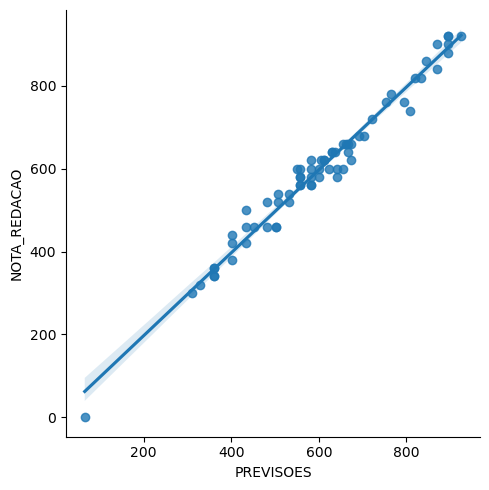

In [28]:
sns.lmplot(x='PREVISOES', y='NOTA_REDACAO', data= municipiox1);

In [29]:
# supondo tirar = 150 no COMP2, 200 no COMP4 e 180 no COMP5
nota_redacao = svr.predict([[150, 200, 180]])
nota_redacao

C:\Users\eduardo.ramos\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([823.5707432])

### SVR com Escalonamento (importante quando a escala das variáveis é muito diferente)

Padronização de escala (trabalha com a média e o desvio padrão, ou seja, média próxima a 0 e desvio padrão próximo de 1)

In [30]:
from sklearn.preprocessing import StandardScaler
escalax = StandardScaler()

In [31]:
independente_escala = escalax.fit_transform(independente)
independente_escala

array([[-0.26267484,  0.97235431,  0.50966882],
       [ 1.04429265,  1.59612877,  0.16988961],
       [ 1.04429265, -0.27519462,  0.16988961],
       [ 1.04429265,  2.21990324,  1.52900647],
       [-0.26267484, -0.27519462,  0.50966882],
       [-2.87660982, -4.0178414 , -1.86878568],
       [-0.26267484, -0.27519462, -0.16988961],
       [-0.26267484, -0.27519462,  0.16988961],
       [-2.00529816, -0.27519462, -0.16988961],
       [-0.26267484, -0.27519462,  0.16988961],
       [ 0.60863682, -0.27519462,  0.84944804],
       [-0.26267484, -0.27519462,  1.18922725],
       [ 0.17298099,  0.97235431,  0.84944804],
       [ 1.47994848, -0.27519462,  0.16988961],
       [-0.26267484, -0.27519462, -0.16988961],
       [-0.26267484, -0.27519462,  1.18922725],
       [ 0.60863682, -0.27519462,  0.16988961],
       [-0.26267484, -0.27519462,  0.84944804],
       [ 0.17298099, -0.89896908, -1.86878568],
       [ 1.04429265,  0.97235431,  1.52900647],
       [-0.26267484, -0.89896908, -1.868

In [32]:
escalay = StandardScaler()
dependente_escala = escalay.fit_transform(dependente)
dependente_escala

array([[ 0.36177956],
       [ 1.06133435],
       [ 0.12859463],
       [ 1.64429667],
       [ 0.12859463],
       [-3.48577178],
       [-0.22118276],
       [-0.1045903 ],
       [-0.57096016],
       [-0.22118276],
       [ 0.47837202],
       [ 0.01200217],
       [ 0.71155695],
       [ 0.47837202],
       [-0.22118276],
       [ 0.36177956],
       [ 0.01200217],
       [ 0.24518709],
       [-0.80414509],
       [ 1.29451928],
       [-1.03733002],
       [-0.45436769],
       [ 0.24518709],
       [ 0.82814942],
       [ 0.24518709],
       [-0.92073755],
       [ 1.29451928],
       [ 0.01200217],
       [-0.1045903 ],
       [ 1.8774816 ],
       [-1.50369988],
       [ 1.76088914],
       [-1.03733002],
       [ 0.94474188],
       [ 1.8774816 ],
       [-0.1045903 ],
       [-0.1045903 ],
       [ 0.12859463],
       [-0.22118276],
       [ 0.24518709],
       [-1.38710741],
       [ 0.12859463],
       [ 0.01200217],
       [ 0.36177956],
       [ 0.36177956],
       [-0

In [37]:
# parâmetros para o kernel = linear, sigmoid, rbf, poly
# verificar qual parâmetro do kernel apresenta o melhor score
from sklearn.svm import SVR
svr2 = SVR(kernel='linear')
svr2.fit(independente_escala, dependente_escala.ravel())
# .ravel() é para retornar matriz 1D (vai retirar um dos colchetes do array da variável dependente)

SVR(kernel='linear')

In [38]:
svr2.score(independente_escala, dependente_escala)

0.9754909220406844

In [39]:
previsoes_escala = svr2.predict(independente_escala)
previsoes_escala

array([ 0.4444152 ,  1.04002277,  0.38560752,  1.80590166,  0.00813836,
       -3.28804653, -0.26573188, -0.12879676, -0.95160424, -0.12879676,
        0.48800966,  0.28200859,  0.75281841,  0.55707561, -0.26573188,
        0.28200859,  0.21413942,  0.14507348, -0.99707779,  1.36962482,
       -1.16854588, -0.58627244,  0.4444152 ,  1.18601938,  0.17960645,
       -1.16854588,  1.34842598, -0.12879676, -0.26573188,  1.97736975,
       -1.36240959,  1.75923134, -0.95040746,  0.9242865 ,  1.75923134,
       -0.26573188,  0.21413942,  0.04267133, -0.12879676,  0.14507348,
       -1.45575025,  0.08934166,  0.11173728,  0.43227784,  0.3632119 ,
       -0.40266699, -1.63627983, -0.67653723, -1.16854588, -1.58054801,
       -1.36240959, -0.07306494, -0.62080541, -0.62080541, -0.26573188,
       -0.07306494,  1.75923134, -0.40266699, -0.12879676,  1.62229622,
        1.62229622, -0.53960211, -1.36240959, -0.30026485, -0.67653723,
        1.4853611 ,  1.21149087, -0.89467565])

Revertendo a transformação da escala

In [41]:
dependente_inverse = escalay.inverse_transform(dependente_escala)
previsoes_inverse = escalay.inverse_transform(previsoes_escala.reshape(-1, 1))

In [42]:
dependente_inverse

array([[660.],
       [780.],
       [620.],
       [880.],
       [620.],
       [  0.],
       [560.],
       [580.],
       [500.],
       [560.],
       [680.],
       [600.],
       [720.],
       [680.],
       [560.],
       [660.],
       [600.],
       [640.],
       [460.],
       [820.],
       [420.],
       [520.],
       [640.],
       [740.],
       [640.],
       [440.],
       [820.],
       [600.],
       [580.],
       [920.],
       [340.],
       [900.],
       [420.],
       [760.],
       [920.],
       [580.],
       [580.],
       [620.],
       [560.],
       [640.],
       [360.],
       [620.],
       [600.],
       [660.],
       [660.],
       [540.],
       [300.],
       [520.],
       [380.],
       [320.],
       [340.],
       [580.],
       [460.],
       [460.],
       [600.],
       [600.],
       [920.],
       [520.],
       [620.],
       [900.],
       [840.],
       [540.],
       [360.],
       [600.],
       [460.],
       [860.],
       [76

In [43]:
previsoes_inverse

array([[674.17512507],
       [776.34426229],
       [664.08739225],
       [907.72134413],
       [599.3372117 ],
       [ 33.91732892],
       [552.35814912],
       [575.84768041],
       [434.70520001],
       [575.84768041],
       [681.65321755],
       [646.31627428],
       [727.07789363],
       [693.50062952],
       [552.35814912],
       [646.31627428],
       [634.67415497],
       [622.82674299],
       [426.90477327],
       [832.88343077],
       [397.491536  ],
       [497.37336714],
       [674.17512507],
       [801.38818008],
       [628.75044898],
       [397.491536  ],
       [829.24703086],
       [575.84768041],
       [552.35814912],
       [937.13458141],
       [364.23660614],
       [899.71562473],
       [434.91049268],
       [756.49113091],
       [899.71562473],
       [552.35814912],
       [634.67415497],
       [605.26091769],
       [575.84768041],
       [622.82674299],
       [348.22516734],
       [613.2666371 ],
       [617.10832967],
       [672

### MÉTRICAS

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
# Erro médio Absoluto
mean_absolute_error(dependente_inverse, previsoes_inverse)

22.066160693515393

In [46]:
# Erro quadrático médio
mean_squared_error(dependente_inverse, previsoes_inverse)

721.1838592777655

In [47]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(dependente_inverse, previsoes_inverse))

26.854866584620478

Neste caso, como as variáveis não estavam em escalas distintas os valores das métricas não variaram tanto.